In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol):    
    d = (a+c)/2.
    e = (b+c)/2.
    fd = f(d)
    fe = f(e)
    dx3 = (d-a)/3.
    Aac = dx3*(fa+4.*fd+fc)
    Acb = dx3*(fc+4.*fe+fb)
    if np.abs(Aab-(Aac+Acb))<=tol: 
        return (16./15.*(Aac+Acb)-Aab/15.)
    else:  
        F1 = adap_quad_comp(f,a,c,d,fa,fc,fd,Aac,tol)
        F2 = adap_quad_comp(f,c,b,e,fc,fb,fe,Acb,tol)
        return F1 + F2
    
def adap_quad(f,a,b,tol):
    c = (a+b)/2.
    fa = f(a)
    fb = f(b)
    fc = f(c)
    dx3 = (c-a)/3.
    Aab = dx3*(fa+4.*fc+fb)
    ival = adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol)    
    return ival

**Problem 1**: (5 pts) Use the adaptive quadrature algorithm to evaluate 

$$
\int_{-1}^{2} \frac{dt}{\sin\left(\sqrt{|t|} \right)}.
$$

State how you arrive at your result i.e. what tolerances do you choose and what degree of accuracy can you argue that they provide you?  Why do you not encounter divide-by-zero difficulties at $t=0$?

In [3]:
f = lambda x : 1/np.sin(np.sqrt(np.abs(x)))
tola = 1e-9
for jj in range(1, 11):
    adquadval = adap_quad(f,-1 ,2 ,tola)
    print("For tol=%1.2e we get the approximation: %1.15f" % (tola, adquadval))
    tola *= .1

For tol=1.00e-09 we get the approximation: 5.314115608654129
For tol=1.00e-10 we get the approximation: 5.314115610156215
For tol=1.00e-11 we get the approximation: 5.314115610277123
For tol=1.00e-12 we get the approximation: 5.314115610287189
For tol=1.00e-13 we get the approximation: 5.314115610288649
For tol=1.00e-14 we get the approximation: 5.314115610288759
For tol=1.00e-15 we get the approximation: 5.314115610288775
For tol=1.00e-16 we get the approximation: 5.314115610288777
For tol=1.00e-17 we get the approximation: 5.314115610288777
For tol=1.00e-18 we get the approximation: 5.314115610288777


Explanation: I used a set of tolerances ranging from 1e-9 to 1e-18 to effectively integrate the function to at least 7 digits of accuracy. In the adap quad algorithm we never actually divide by zero. We do series of dividing two points by 2 so we never actually divide by zero in the evaluation.

**Problem 2**: (5 pts) Write a recursive program which computes $\begin{pmatrix} n \\ k \end{pmatrix}$ where for $0\leq k \leq n$

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k!(n-k)!},
$$

using the formula 

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \begin{pmatrix} n-1 \\ k \end{pmatrix} + \begin{pmatrix} n-1 \\ k-1 \end{pmatrix}
$$

Provide two examples which show your implementation is correct.  

In [4]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n - 1)

def comb_func(n, k):
    if k == 0:
        return 1
    else:
        return (factorial(n - 1))/(factorial(k)*factorial(n - 1 - k)) + (factorial(n - 1))/(factorial(k - 1)*factorial(n - k))
                

In [5]:
print(comb_func(5,3))
print(comb_func(10,6))

10.0
210.0


**Problem 3**: (10 pts) The Hermite polynomials $H_{n}(x)$ are such that $H_{0}(x)=1$, $H_{1}(x)=2x$, and for $n\geq2$, $H_{n}(x)$ satisfies the recurrence relationship

$$
H_{n}(x) = 2xH_{n-1}(x) -2(n-1)H_{n-2}(x), ~ n\geq 2. 
$$

* (6 pts) Write a recursive program to find any Hermite polynomial $H_{n}(x)$.
* (4 pts) Generate a plot of the first six Hermite polyonmials on the interval $-2\leq x \leq 2$.  Your figure should be labeled, have a legend, and different colors should be used to distinguish the different Hermite polynmials in the plot.  

Text(0, 0.5, '$H_n(x)$')

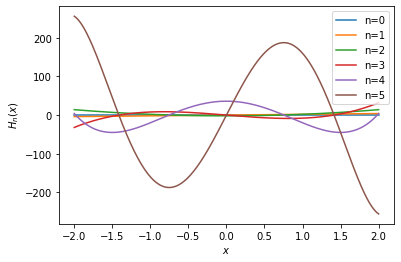

In [16]:
def herm_func(n,x):
    h0 = 1
    h1 = 2*x
    if n == 0:
        return h0
    if n == 1:
        return h1
    if n >=2:
        j = 2
        while j <= n:
            hn = 2*x*h1-2*(n-1)*h0
            h0 = h1
            h1 = hn
           
           
            j += 1
        return Hn

xvals = np.linspace(-2.,2., int(1e3))
yvals0 = [Hermite_polynomial(0,xval) for xval in xvals]
yvals1 = [Hermite_polynomial(1,xval) for xval in xvals]
yvals2 = [Hermite_polynomial(2,xval) for xval in xvals]
yvals3 = [Hermite_polynomial(3,xval) for xval in xvals]
yvals4 = [Hermite_polynomial(4,xval) for xval in xvals]
yvals5 = [Hermite_polynomial(5,xval) for xval in xvals]

plt.plot(xvals, yvals0, label = 'n=0')
plt.plot(xvals, yvals1, label = 'n=1')
plt.plot(xvals, yvals2, label = 'n=2')
plt.plot(xvals, yvals3, label = 'n=3')
plt.plot(xvals, yvals4, label = 'n=4')
plt.plot(xvals, yvals5, label = 'n=5')
plt.legend()

plt.xlabel('$x$')
plt.ylabel('$H_n(x)$')

**Problem 4** : (5 pts) Suppose that for two football teams, the probability, $P$, that team A will beat team B is given by 
$$
P = \frac{1+p}{2}\left(\frac{p}{1-p+p^{2}} \right)^{21}
$$
where $p$ is the probability that team A punts on a fourth down (ok, I really know nothing about football, but I think that kind of makes sense...)  Determine to within $10^{-3}$ the minimal value of $p$ that will ensure that team $A$ beats team $B$ at least half of the time.

In [7]:
def bisec_method(a,b,f,tol):
    d = b
    fa,fb = f(a),f(b)
    if fa*fb < 0:
        c = (b+a)/2
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc) >= tol:
            if fa*fc < 0:
                b = c
            else:
                fa = fc
                a = c
                
            c = (a+b)/2
            fc = f(c)
            capproxs = np.append(capproxs,c)
            
        print ("Our root is: %1.15f" %c)
        #return capproxs
    else:
        print ("Cannot ensure existence of root.")

In [8]:
def prob_func(p):
    return((1+p)/2)*(p/(1 - p + p**2))**21 - 0.5

In [9]:
print(bisec_method(0,1,prob_func,1e-3))

Our root is: 0.842285156250000
None


**Problem 5** : (10 pts) Using Newton's method, explain why the sequence 
$$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}>0,  
$$
converges to $\sqrt{A}$ (4 pts).  Hint, you need to think of a function whose root is $\sqrt{A}$.  Implement the method and characterize for various values of $x_{0}$ how quickly the method converges. (6 pts)

Your root is 2.000000000000000
[4.         2.5        2.05       2.00060976 2.00000009 2.
 2.        ]
Your root is 2.000000000000000
Your root is 2.000000000000000
Your root is 2.000000000000000
Your root is 2.000000000000000


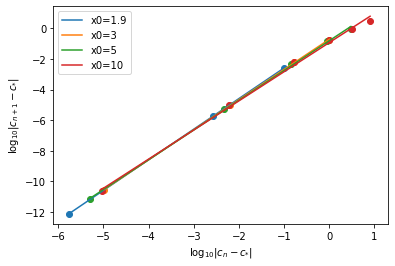

In [19]:
def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0) 
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) >=tol:
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    print ("Your root is %1.15f" %x1)
    return xapprox

def rate_of_conv(capproxs):
    tterms = capproxs.size                  
    cstar = capproxs[tterms-1]
    cnp1 = np.log10(np.abs(capproxs[1:tterms-1] - cstar))   
    cn = np.log10(np.abs(capproxs[0:tterms-2] - cstar))        
    ftprms = np.polyfit(cn, cnp1, 1)
    
    plt.scatter(cn, cnp1)
    plt.plot(cn,(ftprms[0]*cn + ftprms[1]))
    plt.xlabel("$\log_{10}|c_{n}-c_{*}|$")
    plt.ylabel("$\log_{10}|c_{n+1}-c_{*}|$")

A=4
print(Newtons_method(f,fp,A,1e-8))

f = lambda x: x**2.-4.
fp = lambda x: 2.*x

rate_of_conv(Newtons_method(f,fp,1.9,1e-6))
rate_of_conv(Newtons_method(f,fp,3,1e-6))
rate_of_conv(Newtons_method(f,fp,5,1e-6))
rate_of_conv(Newtons_method(f,fp,10,1e-6))

plt.legend(('x0=1.9', 'x0=3', 'x0=5', 'x0=10'), loc= 'best')

Let there be a function that has root
$$
x_n = \sqrt{A} \\
x_n^{2} = A \\
x_n^{2} - A = 0 \\
$$

We end with $ f(x) = x_n^{2} - A $ meaning $f'(x)=2x_n$ 

Using Newtons Method:
$$
\begin{align}
x_n = & x_{n-1} - \frac{(x_{n-1})^{2} - A}{2(x_{n-1})} \\
= & \frac{2(x_{n}-1)^{2} - (x_{n-1})^{2} + A}{2(x_{n-1})} \\
= &\frac{(x_{n-1})^{2}+A}{2(x_{n-1})} \\
= &\frac{(x_{n-1})^{2}}{2(x_{n-1})} + \frac{A}{2(x_{n-1})} \\
= &\frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}\\
\end{align}
$$

**Problem 6**: (5pts) In class for a root $x_{\ast}$ of $f(x)$, i.e. $f(x_{\ast})=0$, if $x_{0}$ is chosen "close" to $x_{\ast}$, then the sequence $\left\{x_{n}\right\}_{n=0}^{\infty}$  where 

$$
x_{n+1} = g\left(x_{n}\right), ~ g(x) = x - \frac{f(x)}{f'(x)}, ~ n\geq 0.
$$

should converge to $x_{\ast}$.  The question is how quickly.  So supposing that $f'(x_{\ast})\neq 0$ show 

* $g(x_{\ast}) = x_{\ast}$ (thus making $x_{\ast}$ a fixed point of $g(x)$)
* $g'(x_{\ast}) = 0$
* $x_{n+1} - x_{\ast} = \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})$

From this, infer that the rate of convergence (see the class notes for a definition of rate of convergence) for Newton's method is $\alpha = 2$.

#6 Answer:
From lecture we see that $ \lim_{n\rightarrow \infty}\frac{|c_{n+1} - c_{*}|}{|c_{n} - c_{*}|^{\alpha}} = \lambda $ and $ |c_{n+1} - c_{*}| \approx \lambda|c_{n} - c_{*}|^{\alpha} $

In this specific example, we see the Taylor Series Expansion as $ x_{n+1} - x_{\ast} = \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3}) $.


We let $ \frac{1}{2}g''(x_{\ast}) = \lambda $ and $ x_{n+1} - x_{*} = |c_{n+1} - c_{*}| $ and $ |c_{n} - c_{*}|^{\alpha} = (x_{n} - x_{*})^{2} $

If this is the case, $ |c_{n} - c_{*}|^{\alpha} = (x_{n} - x_{*})^{2} $ suggests that $\alpha = 2 $.

**Problem 7**: (10 pts) In many cases, getting convergence rates via pen and paper is tricky.  However, we can often readily find them via numerical simulation.  

a.) (4 pts) For 
$$
f(x) = x\cos(x) - \sin^{2}(x), 
$$
find all the roots on the interval $[0,5]$ using Newton's method with a tolerance of $10^{-6}$.


b.) (6 pts) For each root, establish that the rate of convergence is quadratic.  Note, to do this, you will need to save the various points generated by Newton's method in an array.  You will need to find the fixed point.  Then, you should note that if 
$$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$  
then for $n$ large
$$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$
So, then you should be thinking about the slope of a line in a log/log plot.  

Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point.  Does your rate change based on your initial guess?  Again, please elaborate and show plots to make your case.

In [12]:
cos = np.cos
sin = np.sin
f = lambda x: x*cos(x) - (sin(x))**2.
fp = lambda x: cos(x) -x*sin(x) - 2.*sin(x)*cos(x)

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) > tol:
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    print("Your root is %1.15f" %x1)  
    return xapprox

print(Newtons_method(f,fp,0,1e-6))
print(Newtons_method(f,fp,1,1e-6))
print(Newtons_method(f,fp,5,1e-6))

Your root is 0.000000000000000
[0. 0.]
Your root is 0.846446354857408
[1.         0.86139958 0.84664824 0.84644639 0.84644635]
Your root is 4.909534391393232
[5.         4.91128635 4.9095352  4.90953439]


In [13]:
def rate_of_conv(capproxs):
    tterms = capproxs.size 
    cstar = capproxs[tterms - 1]
    cnp1 = np.log10(np.abs(capproxs[1:tterms - 1] - cstar))
    cn = np.log10(np.abs(capproxs[0:tterms - 2] - cstar))
    ftprms = np.polyfit(cn, cnp1, 1)
    print("Intercept value: %1.15f" %10.**(ftprms[1]))
    print("Slope value: %1.15f" %ftprms[0])
    
    plt.scatter(cn, cnp1)
    plt.plot(cn,(ftprms[0]*cn+ftprms[1]))
    plt.xlabel("$\log_{10}|c_{n}-c_{*}|$")
    plt.ylabel("$\log_{10}|c_{n+1}-c_{*}|$")

Your root is 0.846446354857408
Intercept value: 0.628136485888600
Slope value: 1.946743751350857
Your root is 4.909534391393232
Intercept value: 0.188924218963172
Slope value: 1.947993686023944


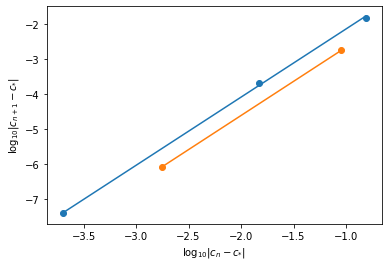

In [14]:
rate_of_conv(Newtons_method(f,fp,1,1e-6))
rate_of_conv(Newtons_method(f,fp,5,1e-6))

Using different $ x_{*} $'s may change the value of the rate slightly, however the rate of converegence will always hover around 2. This suggests that the convergence is quadratic.